1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Dataset

In [2]:
import pandas as pd
PATH = "heart.csv"

df = pd.read_csv(PATH)

In [1]:
df.head()

NameError: name 'df' is not defined

# Data Analysis

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,886.0,54.007901,9.126292,29.0,47.0,54.0,60.0,77.0
sex,886.0,0.683973,0.465186,0.0,0.0,1.0,1.0,1.0
cp,886.0,1.005643,1.024542,0.0,0.0,1.0,2.0,3.0
trestbps,886.0,132.117381,16.807511,94.0,120.0,130.0,140.0,200.0
chol,886.0,247.497743,47.209995,126.0,212.0,245.0,274.0,564.0
fbs,886.0,0.168172,0.374230,0.0,0.0,0.0,0.0,1.0
restecg,886.0,0.495485,0.526669,0.0,0.0,0.0,1.0,2.0
thalach,886.0,149.492099,23.921327,71.0,133.0,153.0,166.0,206.0
exang,886.0,0.310384,0.462912,0.0,0.0,0.0,1.0,1.0
oldpeak,886.0,1.083296,1.147935,0.0,0.0,0.8,1.8,6.2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [31]:
print(df.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [4]:
for col in df.columns:
    print(f"{col} has {df[col].nunique()} unique value(s)")

age has 41 unique value(s)
sex has 2 unique value(s)
cp has 4 unique value(s)
trestbps has 49 unique value(s)
chol has 203 unique value(s)
fbs has 2 unique value(s)
restecg has 3 unique value(s)
thalach has 120 unique value(s)
exang has 2 unique value(s)
oldpeak has 40 unique value(s)
slope has 3 unique value(s)
ca has 5 unique value(s)
thal has 4 unique value(s)
target has 2 unique value(s)


- 4 binary feature: "sex", "fbs", "exang", "target" <br>
- 5 categorical feature: "cp", "restecg", "slope", "ca", "thal"

In [8]:
cate_col = ['sex', 'cp','fbs','restecg','exang','slope','ca','thal','target']
df_cate = df[cate_col]

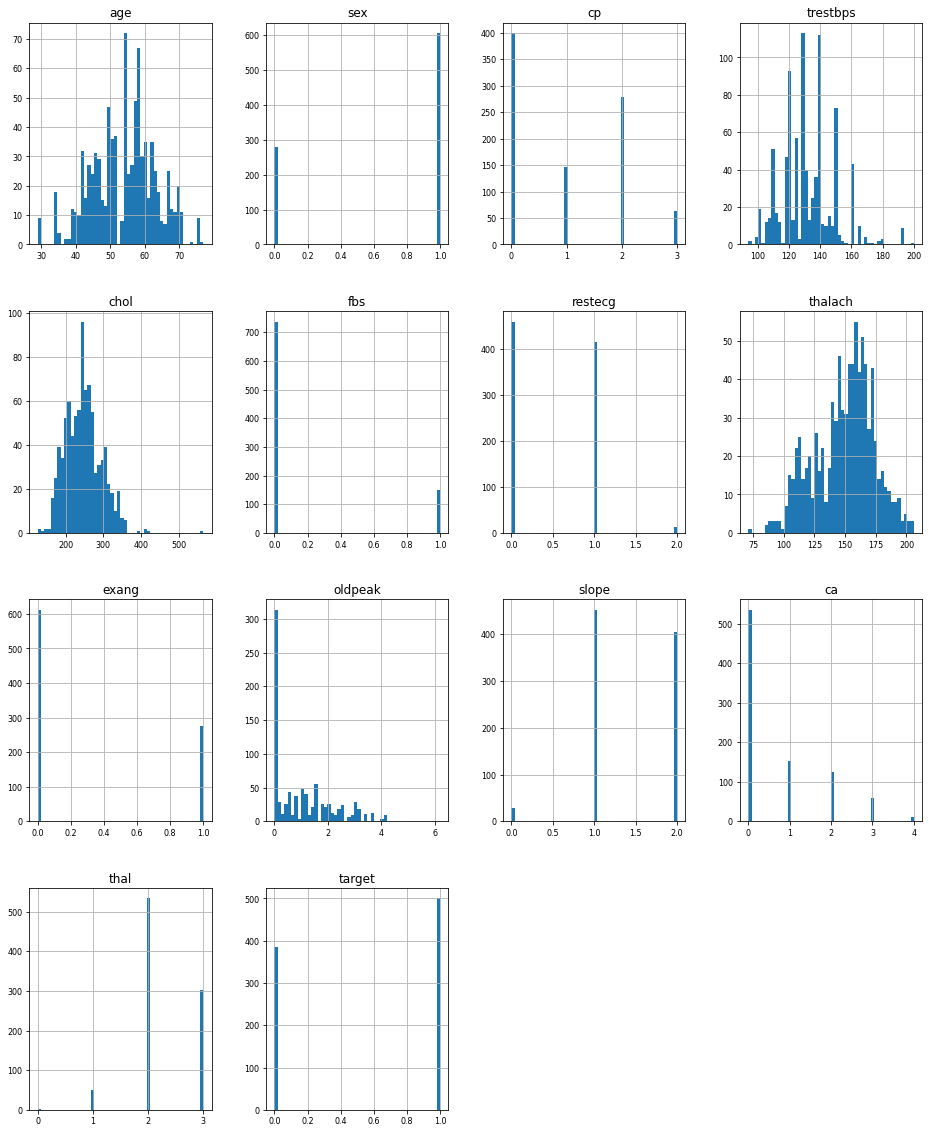

In [46]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Khái quát giá trị phân bố của các biến trong tập Data

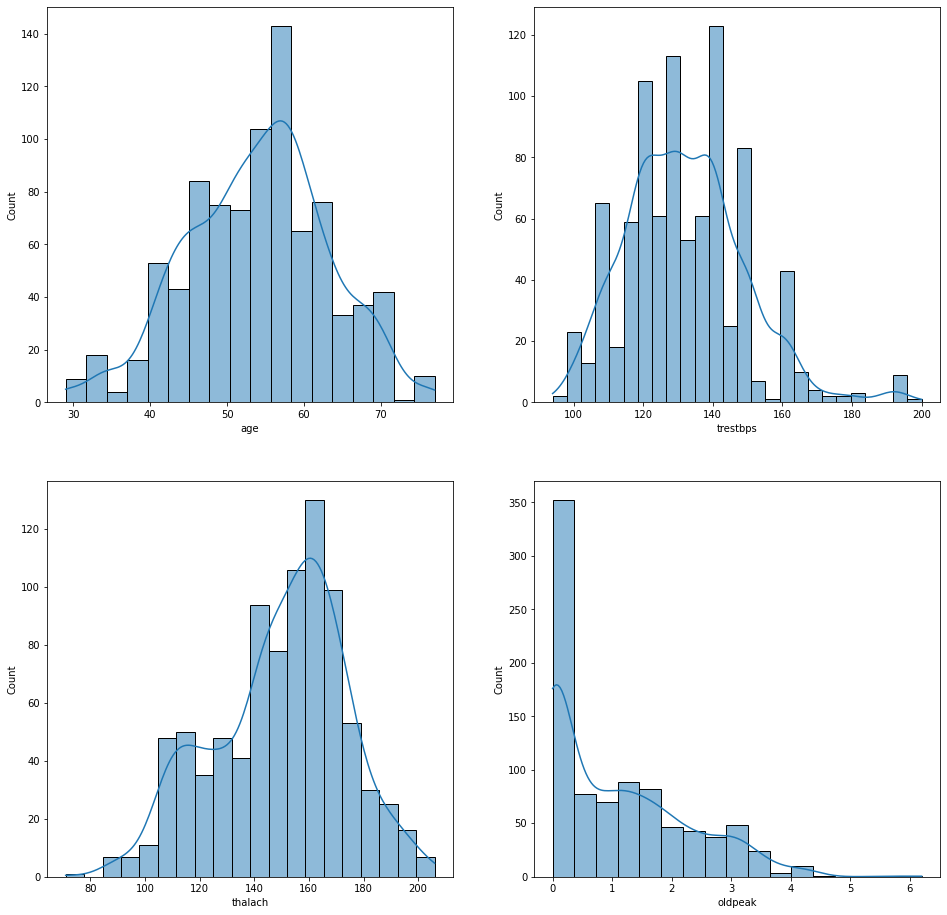

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
sns.histplot(data=df, x="age", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="trestbps", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="thalach", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="oldpeak", kde=True, ax=axs[1, 1])

plt.show()

Biểu đồ cho các biến liên tục (định lượng)

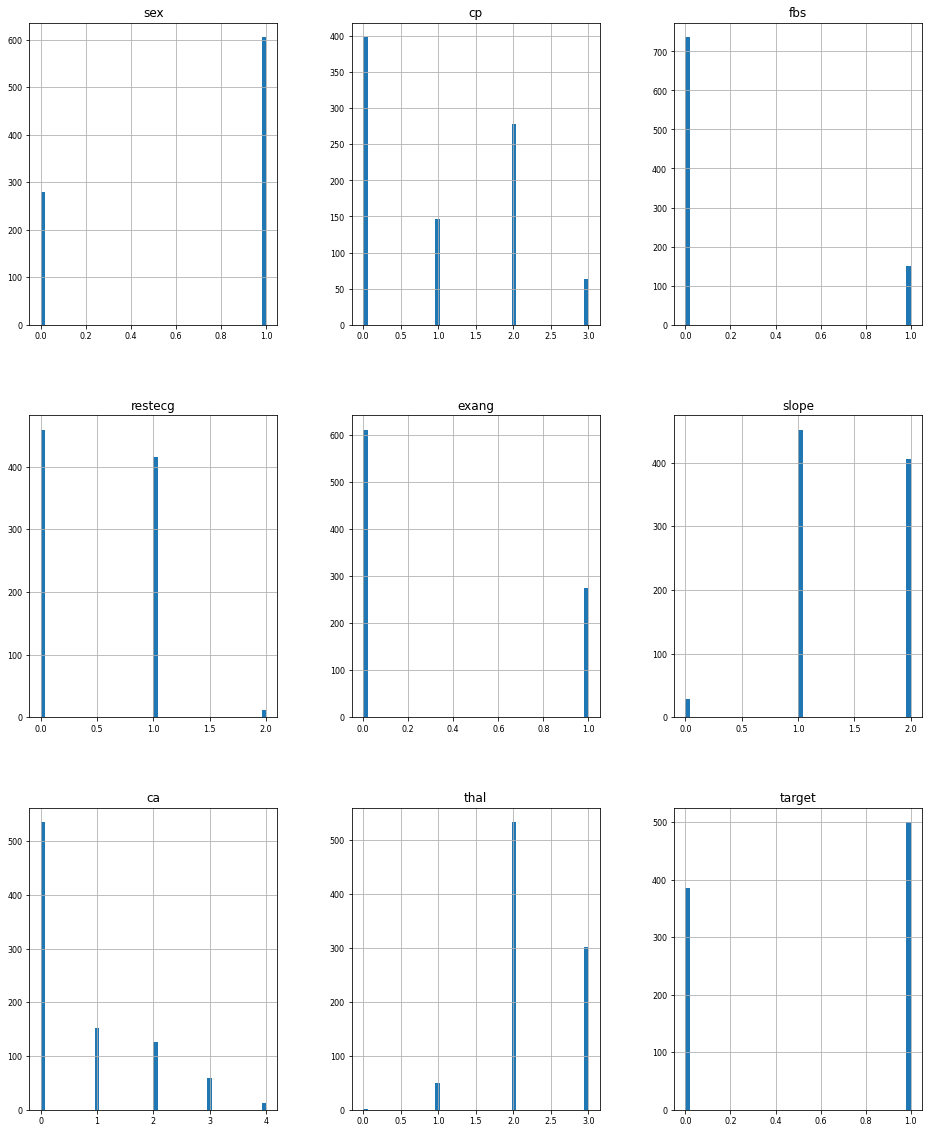

In [51]:
df_cate.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Biểu đồ cho các biến nhị phân và phân loại 

In [5]:
df['target'].value_counts()

1    500
0    386
Name: target, dtype: int64

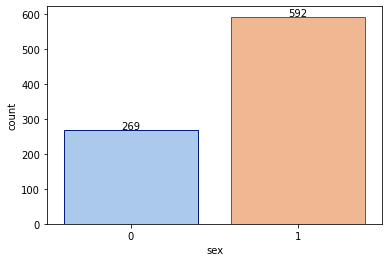

In [25]:
ax = sns.countplot(data=df,x="sex",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height+0.3,'{:.0f}'.format(height), ha="center")

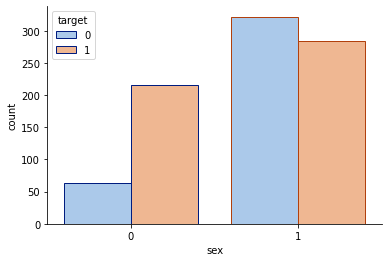

In [7]:
sns.countplot(data=df,x="sex",hue="target",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3), color='aquarima')
sns.despine()

Có sự chêch lệch giới tính khá đáng kể trong bộ dữ liệu Male: 592 > Female: 269 và khả năng đột quỵ của Male cũng cao hơn rất nhiều so với Female <br>

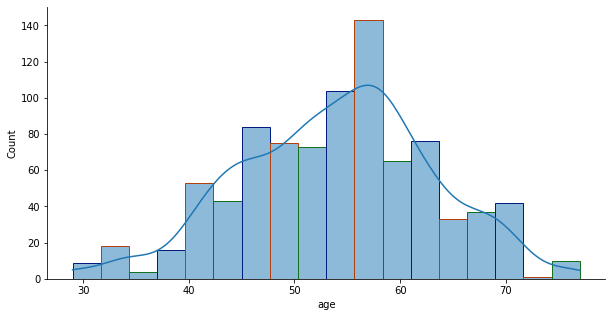

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(x=df.age,palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3),kde=True)
sns.despine()

Độ tuổi trong tập data gần như là phân phối chuẩn, dao động chủ yếu trong khoảng 50-60

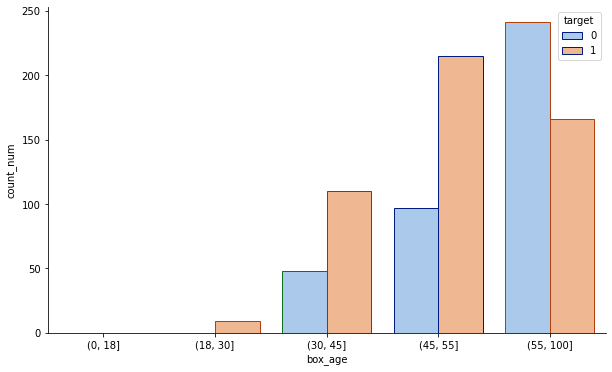

In [72]:
dfage = df.assign(box_age=pd.cut(df["age"],
                         bins=[0,18,30,45,55,100])).loc[:,["box_age","target"]].assign(count_pointer=1).groupby(["box_age","target"]).agg(count_num=("count_pointer","count"))
dfage = dfage.reset_index()
plt.figure(figsize=(10,6))
fig =sns.barplot(x=dfage["box_age"],y=dfage["count_num"],hue=dfage["target"],palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

Qua đồ thị ta nhận thấy được rõ ràng rằng, độ tuổi càng tăng thì khả năng bị đột quỵ càng cao. Khoảng độ tuổi có khả năng bị đột quỵ cao nhất là (45, 55]. <br>
Tổng hợp 2 đồ thị ta kết luận rằng bộ Data cho chúng ta biết đàn ông tuổi càng cao (tầm trung niên) thì càng dễ bị đột quỵ

In [11]:
nume_col = df.columns.drop(cate_col)
nume_col

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

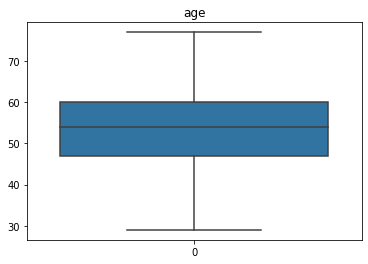

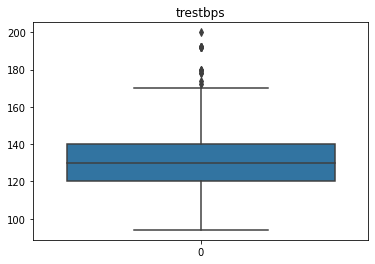

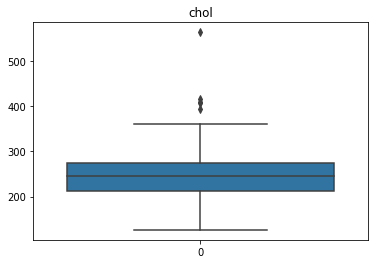

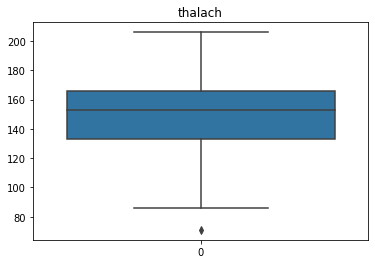

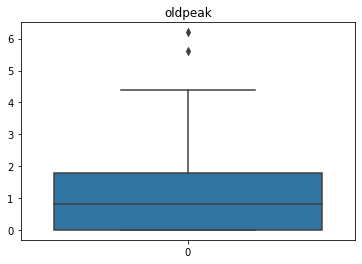

In [12]:
for column in nume_col:
    sns.boxplot(data = df[column])
    plt.title(column)
    plt.show()

Qua biểu đồ boxplot ta dễ dàng nhận thấy được rằng có vài cột có chứa các giá trị outlier nên ta sẽ lưu ý và tiến hành drop các giá trị này ở phần preprocessing data 

In [8]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [9]:
missing(df)

,Missing_Number,Missing_Percent
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


Bộ data không chứa các missing value

<AxesSubplot: >

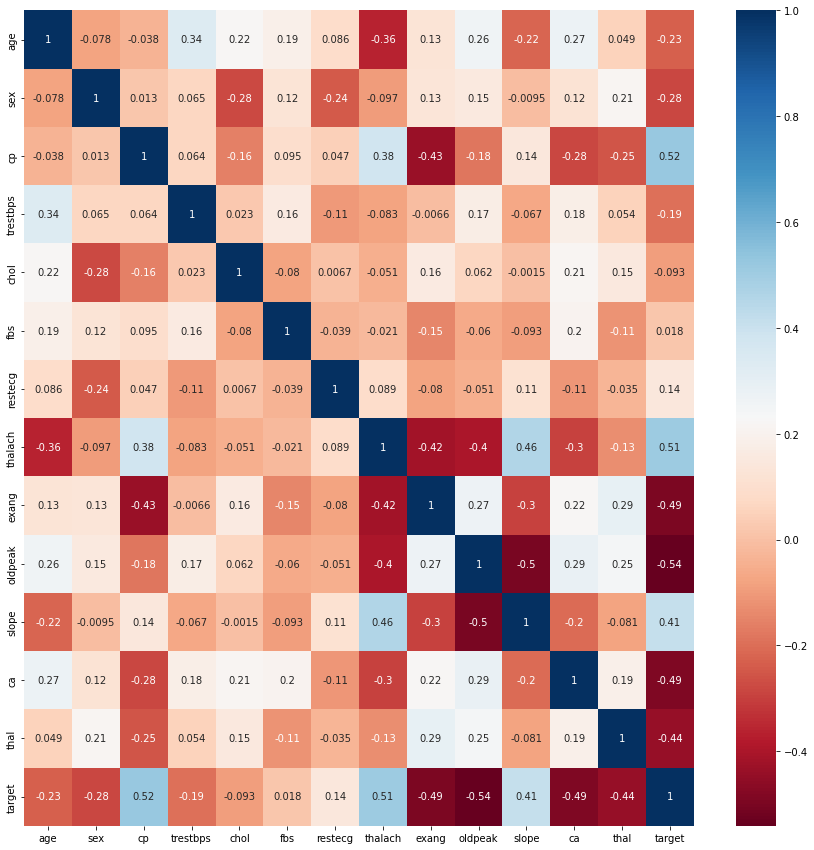

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, cmap='RdBu')

 # Preprocessing Data

## Remove outliers

In [6]:
outliers_columns = ['oldpeak', 'trestbps','chol','thalach']

for column in outliers_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df.shape

(861, 14)

# Feature Engineering

## Scaling categorical columns 

In [9]:
from sklearn.preprocessing import StandardScaler
def feature_engineering(df = pd.DataFrame()):
    all_col = df.columns 
    all_col = all_col.drop(cate_col)
    scale = StandardScaler()
    df[all_col] = scale.fit_transform(df[all_col])
    return df
df = feature_engineering(df.copy())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.858367,1,0,-0.728980,0.067914,0,0,-0.218733,0,-0.243468,2,0,3,0
1,1.865552,0,1,1.922977,1.249875,0,1,0.545279,0,-0.601803,2,2,2,1
2,1.865552,0,1,1.922977,1.272176,0,1,0.587724,0,-0.601803,2,2,2,1
3,1.865552,0,1,1.922977,1.294477,0,1,0.630169,0,-0.601803,2,2,2,1
4,1.865552,0,1,1.922977,1.316778,0,1,0.672615,0,-0.601803,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1.538682,0,2,-0.728980,-0.779530,0,0,-1.449641,0,0.383618,1,0,2,1
882,-1.076280,0,2,-1.524567,-2.340611,0,1,1.097066,0,-0.422635,1,0,2,1
883,-0.204626,1,0,-0.198589,0.201721,0,1,0.502834,1,-0.960138,2,1,3,0
884,0.558071,1,3,1.922977,0.603141,0,0,-1.025190,0,-0.960138,2,0,2,0


## Prepare Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
def prepare_X_y(df):
    y = df.pop('target')
    X = df
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [12]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 321
TRAIN_SIZE = 0.8

X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [13]:
X_train.shape

(688, 13)

## Build SK-learn model

In [14]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold

In [15]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

## Basic Logistic Regression (MODEL 1)

In [16]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_train_pred = log_model.predict(X_train)
y_pred = log_model.predict(X_test)
value = train_val(y_train, y_train_pred, y_test, y_pred)
value

,train_set,test_set
Accuracy,0.954942,0.947977
Precision,0.945409,0.961165
Recall,0.976923,0.951923
f1,0.960908,0.956522


<AxesSubplot: >

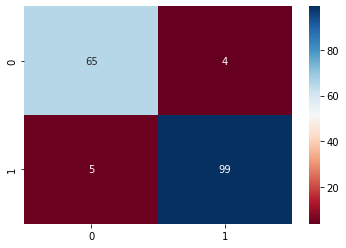

In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, cmap = 'RdBu')

Các chỉ số và khả năng dự đoán của mô hình ban đầu cũng là rất tốt, nhưng chúng ta vẫn sẽ cố gắng tìm một mô hình mới tốt hơn. 

## Pipeline + GridsearchCV - Penalty = l1 (MODEL 2)

In [46]:
def build_model_l1(X, y):
    log_model = LogisticRegression() 
    operation = [("logistic", log_model)]
    model = Pipeline(steps=operation)
    param_grid = {
    "logistic__C": np.logspace(-5, 5, 10),
    "logistic__solver": ['liblinear','saga'],
    "logistic__penalty": ['l1'],
    "logistic__random_state": [RANDOM_STATE],
    "logistic__class_weight": [None, 'balanced'],
    "logistic__max_iter": [20000]
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=RANDOM_STATE)
    grid_search = GridSearchCV(model, param_grid, n_jobs=2, cv = cv, scoring='f1',return_train_score=True, verbose=True)
    grid_search.fit(X, y)
    
    return grid_search

In [47]:
model = build_model_l1(X_train, y_train)
model

Fitting 50 folds for each of 40 candidates, totalling 2000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=321),
             estimator=Pipeline(steps=[('logistic', LogisticRegression())]),
             n_jobs=2,
             param_grid={'logistic__C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'logistic__class_weight': [None, 'balanced'],
                         'logistic__max_iter': [20000],
                         'logistic__penalty': ['l1'],
                         'logistic__random_state': [321],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='f1', verbose=True)

In [48]:
model.best_score_

0.9551051555217686

In [49]:
model.best_params_

{'logistic__C': 0.2782559402207126,
 'logistic__class_weight': None,
 'logistic__max_iter': 20000,
 'logistic__penalty': 'l1',
 'logistic__random_state': 321,
 'logistic__solver': 'saga'}

In [50]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
value = train_val(y_train, y_train_pred, y_test, y_pred)
value

,train_set,test_set
Accuracy,0.952035,0.947977
Precision,0.945137,0.952381
Recall,0.971795,0.961538
f1,0.958281,0.956938


<AxesSubplot: >

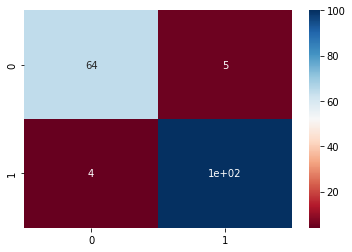

In [51]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, cmap = 'RdBu')

## Pipeline + GridsearchCV - Penalty = l2 (MODEL 3)

In [52]:
def build_model_l1(X, y):
    log_model = LogisticRegression() 
    operation = [("logistic", log_model)]
    model = Pipeline(steps=operation)
    param_grid = {
    "logistic__C": np.logspace(-5, 5, 10),
    "logistic__solver": ['liblinear','lbfgs', 'newton-cg','sag'],
    "logistic__penalty": ['l2'],
    "logistic__random_state": [RANDOM_STATE],
    "logistic__class_weight": [None, 'balanced'],
    "logistic__max_iter": [20000]
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=RANDOM_STATE)
    grid_search = GridSearchCV(model, param_grid, n_jobs=2, cv = cv, scoring='f1',return_train_score=True, verbose=True)
    grid_search.fit(X, y)
    
    return grid_search

In [53]:
model = build_model_l1(X_train, y_train)
model

Fitting 50 folds for each of 80 candidates, totalling 4000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=321),
             estimator=Pipeline(steps=[('logistic', LogisticRegression())]),
             n_jobs=2,
             param_grid={'logistic__C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'logistic__class_weight': [None, 'balanced'],
                         'logistic__max_iter': [20000],
                         'logistic__penalty': ['l2'],
                         'logistic__random_state': [321],
                         'logistic__solver': ['liblinear', 'lbfgs', 'newton-cg',
                                              'sag']},
             return_train_score=True, scoring='f1', verbose=True)

In [54]:
model.best_score_

0.956114937996869

In [55]:
model.best_params_

{'logistic__C': 0.2782559402207126,
 'logistic__class_weight': None,
 'logistic__max_iter': 20000,
 'logistic__penalty': 'l2',
 'logistic__random_state': 321,
 'logistic__solver': 'lbfgs'}

In [56]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
value = train_val(y_train, y_train_pred, y_test, y_pred)
value

,train_set,test_set
Accuracy,0.956395,0.947977
Precision,0.943350,0.952381
Recall,0.982051,0.961538
f1,0.962312,0.956938


Các chỉ số của model mới có phần nhỉnh hơn 

<AxesSubplot: >

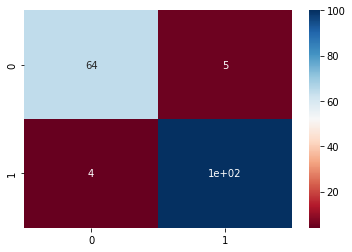

In [57]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, cmap = 'RdBu')

## Pipeline + GridsearchCV - Penalty = l2 with PCA (MODEL 4)

In [65]:
def build_model_l1(X, y):
    log_model = LogisticRegression() 
    pca = PCA(0.99)
    operation = [("pca", pca),("logistic", log_model)]
    model = Pipeline(steps=operation)
    param_grid = {
    "logistic__C": np.logspace(-5, 5, 10),
    "pca__n_components": [12, 13],
    "logistic__solver": ['liblinear','lbfgs'],
    "logistic__penalty": ['l2'],
    "logistic__random_state": [RANDOM_STATE],
    "logistic__class_weight": [None, 'balanced'],
    "logistic__max_iter": [10000, 20000]
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=RANDOM_STATE)
    grid_search = GridSearchCV(model, param_grid, n_jobs=2, cv = cv, scoring='f1',return_train_score=True, verbose=True)
    grid_search.fit(X, y)
    
    return grid_search

In [66]:
model = build_model_l1(X_train, y_train)
model

Fitting 50 folds for each of 160 candidates, totalling 8000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=321),
             estimator=Pipeline(steps=[('pca', PCA(n_components=0.99)),
                                       ('logistic', LogisticRegression())]),
             n_jobs=2,
             param_grid={'logistic__C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'logistic__class_weight': [None, 'balanced'],
                         'logistic__max_iter': [10000, 20000],
                         'logistic__penalty': ['l2'],
                         'logistic__random_state': [321],
                         'logistic__solver': ['liblinear', 'lbfgs'],
                         'pca__n_components': [12, 13]},
             return_train_score=True, scoring='f1', verbose=True)

In [67]:
model.best_score_

0.9567389775407318

In [68]:
model.best_params_

{'logistic__C': 0.2782559402207126,
 'logistic__class_weight': None,
 'logistic__max_iter': 10000,
 'logistic__penalty': 'l2',
 'logistic__random_state': 321,
 'logistic__solver': 'lbfgs',
 'pca__n_components': 12}

In [69]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
value = train_val(y_train, y_train_pred, y_test, y_pred)
value

,train_set,test_set
Accuracy,0.956395,0.936416
Precision,0.943350,0.934579
Recall,0.982051,0.961538
f1,0.962312,0.947867


<AxesSubplot: >

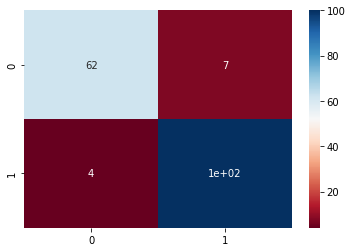

In [70]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, cmap = 'RdBu')

**Kết luận** <br>
Qua việc training 4 model em nhận thấy đối với tập dữ liệu này và sử dụng Logistic Regression thì model 3 đạt hiệu quả tối ưu nhất trong 4 model.

In [85]:
def get_conclusion():
    return "7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words) \n Solver là lbfgs và penalty là l2 \n Metric chính của em trong trường hợp này sẽ là F1 vì em để ý tới khả năng mất cân bằng dữ liệu trong tập data này khi mà sự mất cân bằng thể hiện rõ ở target và target-age, ngưỡng mất cân bằng là 60-40, tuy vừa đủ an toàn nhưng việc chọn f1 làm main metric sẽ làm tối đa hóa xảy ra khả năng mất cân bằng"

In [87]:
print(get_conclusion())

7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words) 
 Solver là lbfgs và penalty là l2 
 Metric chính của em trong trường hợp này sẽ là F1 vì em để ý tới khả năng mất cân bằng dữ liệu trong tập data này khi mà sự mất cân bằng thể hiện rõ ở target và target-age, ngưỡng mất cân bằng là 60-40, tuy vừa đủ an toàn nhưng việc chọn f1 làm main metric sẽ làm tối đa hóa xảy ra khả năng mất cân bằng
